# Data Analysis


0. Pandas library
1. Upload data
2. Methods of data management
3. Slicing
4. Slicing per column
5. Distinct values
7. Aggregate functions
8. Data grouping
9. Data visualization
10. Distribution
11. Relation

----

# Pandas library 🐼


Pandas is the most used library in data analysis, in fact it allows you to load a dataset in Python and save it in a particular object called **Data Frame**

First we need to import the library and it is common practice to import `pandas` using the `pd` alias for simple convenience:

In [ ]:
import pandas as pd

## Upload data

There are different ways to upload data, which can be in different formats. We start by uploading a dataset in csv format ( Comma Separated Values ) and which was saved in [this web page](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv):

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


The dataset, which we just saved as a **Data Frame** on an object named `df`, contains data on measurements of the physical characteristics of some penguin populations.

We can use the `.info()` method on our `df` Data Frame to get general information about the composition of our data:

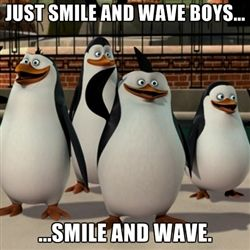

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In addition to providing us with information about the column names and the type of variable (string or numeric), the output also tells us how many rows there are in the dataset and if and how many missing values there are for each column; for example:

* the `species` column has no missing values
* the `sex` column has 344 - 333 = 11 missing values

## Methods of data management

Pandas offers several **attributes** and **methods** that can be applied to objects of type Data Frame:
- an *attribute is a data or a function that specifies a characteristic* of an object;
- a *method is a function that performs operations on an object*;
- these objects have in turn been instantiated by a **class**, such as the DataFrame class for example.

> 🤓 Check out [this article](https://towardsdatascience.com/explaining-python-classes-in-a-simple-way-e3742827c8b5) for a soft introduction to the subject of classes in Python.

## Slicing

As we have seen for strings, it is also possible to index DataFrames, which have a double index: one for the rows and one for the columns of the dataset. There are [several ways](https://pandas.pydata.org/docs/user_guide/indexing.html) to obtain a specific row or column from a Data Frame but, in order not to confuse the ideas too much, we will only look at a few.

**Slicing per row**

The `.loc[]` indicator allows us to locate a certain row by specifying the "label" of the row (in this case the index itself) that we want to obtain:

In [ ]:
df.loc[8]

species                 Adelie
island               Torgersen
bill_length_mm            34.1
bill_depth_mm             18.1
flipper_length_mm        193.0
body_mass_g             3475.0
sex                        NaN
Name: 8, dtype: object

In [ ]:
# to select multiple rows
df.loc[[2,8]]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN


## Slicing per column

The `.loc[]` flag also works for columns, but this time we'll need to specify that we're interested in them (and not rows). To do this we use the `:` operator to ask to return **all rows** and after the `,` we specify the column (or columns) we want to select:

In [ ]:
df.loc[:,'island']

0      Torgersen
1      Torgersen
2      Torgersen
3      Torgersen
4      Torgersen
         ...    
339       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 344, dtype: object

In [ ]:
# to select specific rows and columns
df.loc[:10,['species','bill_length_mm']]

,species,bill_length_mm
0,Adelie,39.1
1,Adelie,39.5
2,Adelie,40.3
3,Adelie,NaN
4,Adelie,36.7
5,Adelie,39.3
6,Adelie,38.9
7,Adelie,39.2
8,Adelie,34.1
9,Adelie,42.0


## Distinct values

The `.unique()` method, when applied to a column of a Data Frame, returns the **distinct (or unique)** values contained in that column:

In [ ]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

> ☝️ The spreadsheet equivalent of the `.unique()` method is the "remove duplicates" feature or the `=UNIQUE()` function.

### Filter data

We see that there are a total of three penguin species in the dataset. If we wanted to **filter** the Data Frame and see only the observations belonging to the 'Gentoo' species we can insert a **boolean mask** inside the `[]` operator like this:

In [ ]:
df[df['species'] == 'Gentoo']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
# lines with the sort 'Gentoo' will result in boolean TRURE the rest FALSE
df['species'] == 'Gentoo'

0      False
1      False
2      False
3      False
4      False
       ...  
339     True
340     True
341     True
342     True
343     True
Name: species, Length: 344, dtype: bool

> ☝️ The spreadsheet equivalent is a column filter (the funnel symbol) or the `=QUERY()` function with a `WHERE` clause.

## Aggregate functions

If at this point we wanted to know the mean value of the `body_mass_g` column of this species of penguin, it would be enough to add the `.mean()` method to the previous line preceded by the name of the column for which we want to calculate the mean, i.e. `[' body_mass_g']`:

In [ ]:
df['body_mass_g'].mean()

4201.754385964912

In [ ]:
df[df['species']=='Gentoo']['body_mass_g'].mean()

5076.016260162602

The 'Gentoo' species has an average mass higher than the total DataFrame average; therefore it is assumed that they are larger than the other species.

To display more characters you create CONDITIONS:

 `df [ (1st condiction) & (2nd condiction) ] `

In [ ]:
# AND boolean operator: and = &
df[ (df['species']=='Gentoo') & (df['sex'] == 'MALE') ]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
227,Gentoo,Biscoe,46.7,15.3,219.0,5200.0,MALE
229,Gentoo,Biscoe,46.8,15.4,215.0,5150.0,MALE
...,...,...,...,...,...,...,...
333,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,MALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE


> ☝️ The spreadsheet equivalent would be:
- use the `=AVERAGE()` function on the `body_mass_g` column after filtering the `species` variable, or
- use the `=QUERY()` function with the `WHERE` clause and the `AVG()` aggregate function in the `SELECT` clause.

## Data grouping

To know the average of all three species we could repeat the previous step three times (changing the name of the species each time). A faster and more efficient way to achieve the same result is to use the `.groupby()` method.

In [ ]:
df.groupby('species')['body_mass_g'].mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

> ☝️ This is a Pandas🐼 object, to get a DataFrame you need to put the parameter `as_index = False` 👇

In [ ]:
df.groupby('species', as_index = False)['body_mass_g'].mean()

,species,body_mass_g
0,Adelie,3700.662252
1,Chinstrap,3733.088235
2,Gentoo,5076.016260


> ☝️ The spreadsheet equivalent of the `.groupby()` method would be:
- use a pivot table, or
- use the `QUERY()` function with the `GROUP BY` clause, remembering to insert the grouping variable and the `AVG()` aggregation function in the `SELECT`.

> *Note: the `as_index = False` parameter specifies that we want the aggregate variable (in this case `species`) to be displayed as a column of the DataFrame (as it happens in the SQL output) and not as the index of the DataFrame (which would be the default output of the `.groupby()`). For more information, see the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).*

`group by` is an important concept in data analysis and in fact is also found in the SQL query language and, as seen above, even in spreadsheets.

In fact, in a group by we go to **group all the lines** of a variable that have the same category (for example the penguin species). A group by is always **followed by an aggregation function** (such as the sum, the average, etc.) because having grouped so many rows we must summarize the numerical variables with a synthesis function, such as the sum or the average .

Another aggregation function is count, if we wanted to know the number of male and female penguins, for example, we could group by `sex` and then count the number of rows using the `.size()` method:

In [ ]:
df.groupby('sex', as_index = False).size()

,sex,size
0,FEMALE,165
1,MALE,168


> ❓👇 If you wanted to group by multiple variables?

In [ ]:
df.groupby(['sex', 'species']).size()

sex     species  
FEMALE  Adelie       73
        Chinstrap    34
        Gentoo       58
MALE    Adelie       73
        Chinstrap    34
        Gentoo       61
dtype: int64

In [ ]:
df.groupby(['sex', 'species'], as_index = False).size()

,sex,species,size
0,FEMALE,Adelie,73
1,FEMALE,Chinstrap,34
2,FEMALE,Gentoo,58
3,MALE,Adelie,73
4,MALE,Chinstrap,34
5,MALE,Gentoo,61


> 🤓 Check out [this article](https://realpython.com/pandas-groupby/) to learn more about the `groupby()` method in Python; also, watch [this video](https://www.youtube.com/watch?v=x2_mOJ3skSc&t=178s) to understand
how `GROUP BY` clause works in SQL.

## Data visualization

There are several libraries for visualizing data in Python. The best known and most used is undoubtedly [matplotlib](https://matplotlib.org/stable/users/getting_started/), it is very versatile and allows you to create a [multitude](https://matplotlib.org/stable /plot_types/index.html#) of plots and visualizations. Another library worth mentioning is [plotly](https://plotly.com/python/), much appreciated above all for its interactivity and versatility.

The [seaborn](https://seaborn.pydata.org/) library is also very popular, both for its ease of use and for its aesthetic factor, which in our opinion beats matplotlib despite being based on this very 'last library and is therefore the one we will deal with here.

It is common practice to import `seaborn` with the alias `sns` and immediately after [set the theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme) with the command `sns .set_theme()`:

In [ ]:
import seaborn as sns
sns.set_theme()

## Distribution

Let's try to create a graph right away. Let's imagine we want to explore the **distribution** of penguin body mass; a great tool for doing this is the **boxplot**:

<Axes: xlabel='body_mass_g'>

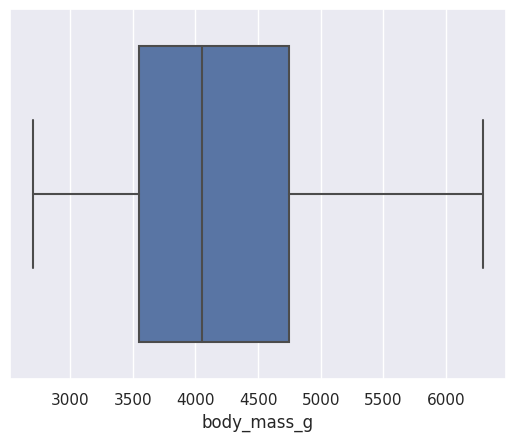

In [ ]:
sns.boxplot(data=df, x='body_mass_g')

**How do we interpret this graph?** 🫤❓

- First of all, on the horizontal axis we read the value of the mass of the penguins and note that on the extreme left and right of the graph, there are vertical bars, these two points represent the **minimum** and the **maximum** value recorded in the dataset.

- Between these two values, we find all the observations in our dataset.

- Within the left and right limits of the "blue box" we find 50% of our observations, in fact:
   - the left limit of the "blue box" represents the **first quartile**, i.e. the point that separates the first 25% of the data (on the left) from the remaining 75% (on the right);
   - the line in the middle of the "blue box" represents the **median**, i.e. the point that separates the first 50% of the data (on the left) from the remaining 50% (on the right);
   - the right limit of the "blue box" represents the **third quartile**, i.e. the point that separates the first 75% of the data (on the left) from the remaining 25% (on the right);

- the **interquartile range** is defined as the difference of the value in the third quartile minus the value in the first quartile.

Once you understand how to interpret a boxplot (and after having seen many), this graph allows us to guess at a glance the distribution of a variable. In this case, for example, we can immediately see that half of the penguins in our dataset have a mass between 3.5 kg and 4.75 kg. We also note that, with respect to the total range of variation (min - max), the distribution of body mass of the penguins is slightly shifted to the left, in the direction of lighter masses.

It is often useful to analyze how the distribution of one variable changes based on a third categorical variable; for example we might want to see how the body mass of penguins changes based on their gender:

<Axes: xlabel='body_mass_g', ylabel='sex'>

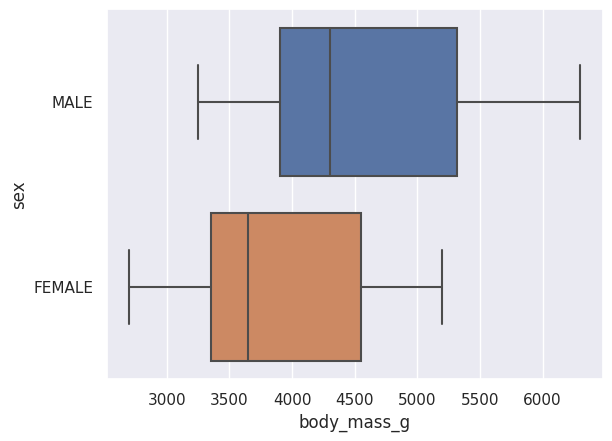

In [ ]:
sns.boxplot(data=df, x='body_mass_g', y='sex')

As might be expected, in general male penguins have larger body masses than female penguins, although there is considerable overlap: for example, *the bottom 25% of females have greater body masses than the top 50% of males* .

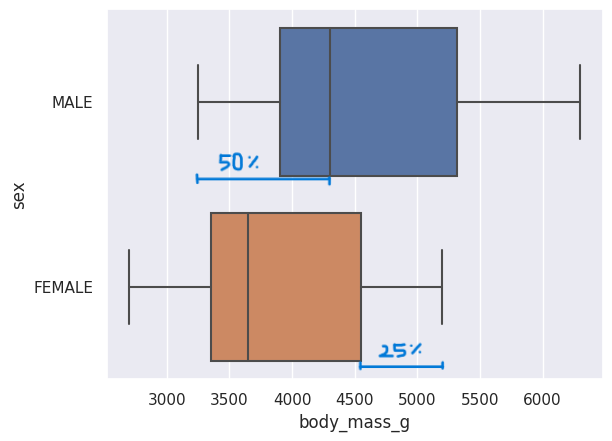

Very likely that it is due to the different SPECIES of penguins: probably 25% of female penguins with mass greater than that of male penguins belong to the species 'Gentoo', which happens to be the species with greater body mass.

Then with a BOOLEAN MASK you can filter by the species:

<Axes: xlabel='body_mass_g', ylabel='sex'>

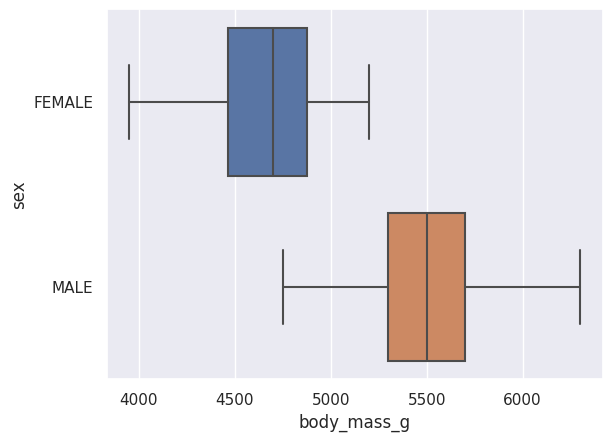

In [ ]:
sns.boxplot(data=df[df['species']=='Gentoo'] , x='body_mass_g', y='sex')

> 🤓 Read this [article](https://builtin.com/data-science/boxplot) to learn more about data distribution and how to read a Box Plot.

## Relation

When we want to evaluate the relationship between two variables, one of the best graphs we can use is the **scatterplot**, which allows us to observe how one variable behaves as the other varies.

We can use the [`sns.scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) function of `seaborn` to plot the body mass of the penguins on the horizontal axis and the length of the wings on the vertical axis:

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

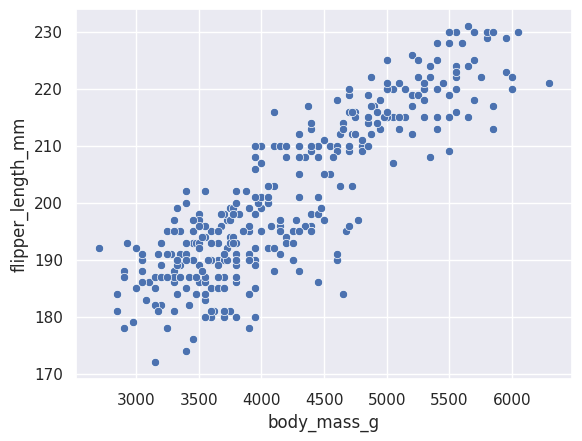

In [ ]:
sns.scatterplot(df, x='body_mass_g', y='flipper_length_mm')

We immediately notice a linear relationship between the two variables, that is, as the length of the wings increases, the body mass increases; and if we think about it it makes sense, the longer a penguin's wing is, the bigger the penguin is and therefore the greater its mass.

We can also add a categorical variable like `sex` or `species` using the `hue` parameter:

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

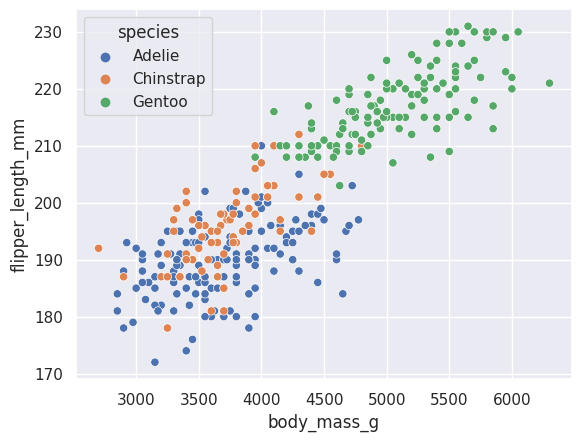

In [ ]:
# the hue parameter is used to diversify with colors based on a variable
sns.scatterplot(df, x='body_mass_g', y='flipper_length_mm', hue='species')

[(0.0, 300.0)]

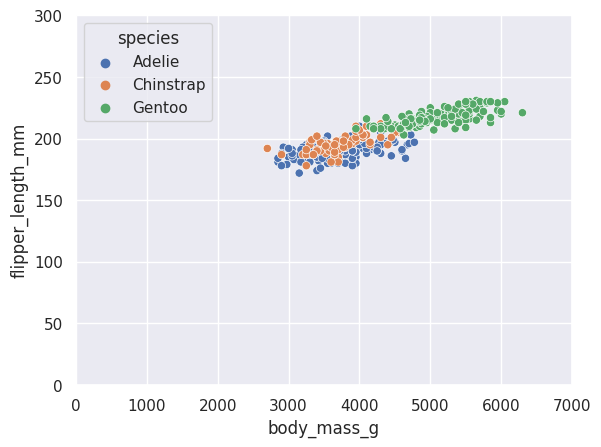

In [ ]:
# it is possible to customize the graphs, an example:
ax = sns.scatterplot(df, x='body_mass_g', y='flipper_length_mm', hue='species')
ax.set(xlim =(0, 7000))
ax.set(ylim =(0, 300))